# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
df = pd.read_csv('/content/data_cluster.csv')
print(f'Jumlah baris dan kolom: {df.shape}')
print('\n', df.head())
print('\n', df.info())
print('\nPersebaran data pada kolom numerik:')
df.describe()

Jumlah baris dan kolom: (4273, 20)

    global_sales_bin  critic_score_bin  critic_count_bin  user_score_bin  \
0                 0                 0                 1               1   
1                 0                 1                 2               1   
2                 0                 1                 1               0   
3                 0                 1                 2               1   
4                 0                 1                 1               1   

   user_count_bin  year_bin_1990s  year_bin_2000s  year_bin_2010s  \
0               1               0               1               0   
1               1               0               1               0   
2               2               0               1               0   
3               2               0               1               0   
4               1               0               1               0   

   platform_bin_Other  platform_bin_PC  platform_bin_PlayStation  \
0                   0        

,global_sales_bin,critic_score_bin,critic_count_bin,user_score_bin,user_count_bin,year_bin_1990s,year_bin_2000s,year_bin_2010s,platform_bin_Other,platform_bin_PC,platform_bin_PlayStation,genre_bin_Casual-Based,genre_bin_Shooter-Based,genre_bin_Sport-Based,genre_bin_Strategy-Based,Rating_E10+,Rating_M,Rating_RP,Rating_T,cluster
count,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000,4273.000000
mean,1.137608,0.970981,1.096419,1.301194,1.109993,0.016616,0.807395,0.175989,0.500585,0.067400,0.294407,0.182776,0.164989,0.267494,0.104844,0.153054,0.157735,0.000468,0.350105,1.169904
std,0.414249,0.517123,0.364081,0.796963,0.479521,0.127842,0.394391,0.380855,0.500058,0.250743,0.455829,0.386528,0.371214,0.442704,0.306389,0.360082,0.364535,0.021632,0.477059,0.754923
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Memisahkan fitur (X) dan target (y)
X = df.drop('cluster', axis=1)
y = df['cluster']

# Membagi data training dan testing dengan hold-out Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Jumlah baris data training: {X_train.shape[0]}")
print(f"Jumlah baris data testing: {X_test.shape[0]}")

Jumlah baris data training: 3418
Jumlah baris data testing: 855


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
# Training dataset menggunakan algoritma Random Forest dan Decision Tree
rf_model = RandomForestClassifier(max_depth=3, n_estimators=25, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=3, min_samples_split=20, min_samples_leaf=10, random_state=42)

# Melatih model
rf_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
print('Model training selesai')

Model training selesai


Tulis naraPada bagian ini, saya melatih dua model:

1. Random Forest

  Random Forest adalah algoritma ensemble yang menggabungkan beberapa pohon keputusan untuk meningkatkan akurasi dan stabilitas. Saya menggunakan n_estimators=25 untuk membangun 25 pohon keputusan, membatasi kedalaman setiap pohon dengan max_depth=3 agar model lebih sederhana dan tidak terlalu overfit dan untuk memastikan setiap node hanya terpecah jika memiliki minimal 42 sampel. Kombinasi ini memungkinkan Random Forest memberikan prediksi yang lebih kuat dan tahan terhadap noise dalam data, dibandingkan dengan pohon keputusan tunggal.

2. Decision Tree

  Decision Tree bekerja dengan memecah data menjadi subset berdasarkan aturan yang dihasilkan dari fitur terbaik. Saya membatasi kedalaman pohon dengan max_depth=3 untuk mengurangi kompleksitas model, serta mengatur parameter min_samples_split=20 untuk memastikan setiap node hanya terpecah jika memiliki minimal 42 sampel, dan min_samples_leaf=10 untuk mengatur jumlah minimum sampel di setiap leaf node. Hal ini bertujuan untuk menghindari overfitting dan menjaga keseimbangan antara bias dan varians.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

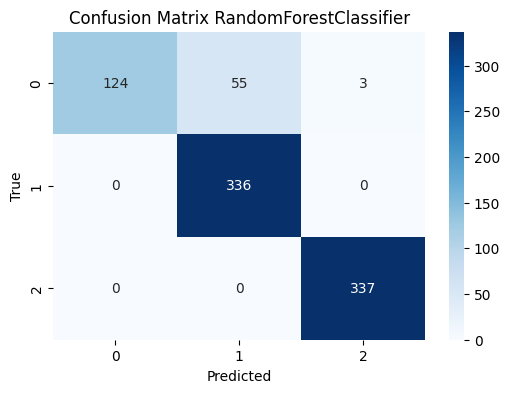

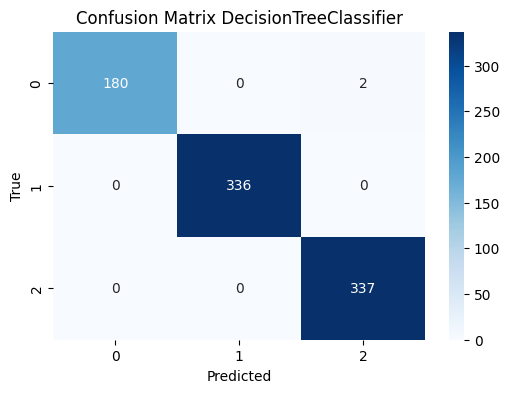


Hasil Evaluasi Model (Data Testing):
           Model  Accuracy  Precision  Recall  F1-Score
0  Random Forest     93.22      94.12   93.22     92.82
1  Decision Tree     99.77      99.77   99.77     99.77


In [ ]:
# Evaluasi model pada data testing
models = [rf_model, dt_model]
model_results = {
    'Model': ['Random Forest', 'Decision Tree'],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1-Score': [],
}

for model in models:
    y_pred = model.predict(X_test)

    model_results['Accuracy'].append(round(accuracy_score(y_test, y_pred) * 100, 2))
    model_results['Precision'].append(round(precision_score(y_test, y_pred, average='weighted') * 100, 2))
    model_results['Recall'].append(round(recall_score(y_test, y_pred, average='weighted') * 100, 2))
    model_results['F1-Score'].append(round(f1_score(y_test, y_pred, average='weighted') * 100, 2))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix {model.__class__.__name__}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Tampilkan hasil evaluasi
df_metrics = pd.DataFrame(model_results)
print("\nHasil Evaluasi Model (Data Testing):")
print(df_metrics)

Hasil evaluasi model algoritma Random Forest dan Decision Tree:
1. Random Forest:

  Model Random Forest menunjukkan performa yang sangat baik dengan akurasi 93.22%, yang berarti model mampu mengklasifikasikan sebagian besar data dengan benar. Precision 94.12% menunjukkan bahwa ketika model memprediksi suatu kelas, terdapat 94.12% kemungkinan bahwa prediksinya benar. Recall 93.22% menandakan bahwa model dapat menangkap 93.22% dari total sampel yang seharusnya diklasifikasikan ke dalam kelas tersebut. F1-Score 92.82% menunjukkan keseimbangan antara precision dan recall yang cukup baik. Meskipun performanya tinggi, masih ada sedikit kesalahan klasifikasi yang dapat dikurangi dengan penyempurnaan hyperparameter atau peningkatan preprocessing data.

2. Decision Tree

  Model Decision Tree menunjukkan hasil yang hampir sempurna dengan akurasi 99.77%, yang berarti model mampu mengklasifikasikan hampir seluruh data dengan benar. Dengan precision, recall, dan F1-score masing-masing 99.77%, model ini hampir tidak memiliki kesalahan dalam memprediksi kelas data. Hal ini mengindikasikan bahwa Decision Tree mungkin terlalu fit terhadap data training (overfitting), sehingga model bisa memiliki performa yang lebih rendah jika diuji dengan data yang benar-benar baru.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
# Hyperparameter Tuning Random Forest Model

# Definisikan ruang parameter untuk GridSearch
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

# Inisialisasi GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model pada training data
grid_search_rf.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation score for Random Forest:", grid_search_rf.best_score_)

# Menggunakan model terbaik
best_rf_grid = grid_search_rf.best_estimator_

# Evaluasi pada data testing
rf_test_score_grid = best_rf_grid.score(X_test, y_test)
print("Test set score for Random Forest (GridSearch):", rf_test_score_grid)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 10}
Best cross-validation score for Random Forest: 0.998243901603692
Test set score for Random Forest (GridSearch): 0.9988304093567252


In [ ]:
# Hyperparameter Tuning Random Forest Model

# Definisikan ruang parameter untuk GridSearch
param_grid_dt = {
    'max_depth': [1, 3, 5, 10, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
}

# Inisialisasi GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=0),
    param_grid=param_grid_dt,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit model pada data training
grid_search_dt.fit(X_train, y_train)

# Menampilkan hasil terbaik
print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score for Decision Tree:", grid_search_dt.best_score_)

# Gunakan model terbaik
best_dt_grid = grid_search_dt.best_estimator_

# Evaluasi pada data testing
dt_test_score_grid = best_dt_grid.score(X_test, y_test)
print("Test set score for Decision Tree (GridSearch):", dt_test_score_grid)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best cross-validation score for Decision Tree: 0.9982447578193898
Test set score for Decision Tree (GridSearch): 0.9988304093567252


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
# Hasil evaluasi untuk Decision Tree dan Random Forest setelah tuning
y_pred_rf = best_rf_grid.predict(X_test)
y_pred_dt = best_dt_grid.predict(X_test)

accuracy_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
precision_rf = round(precision_score(y_test, y_pred_rf, average='weighted') * 100, 2)
recall_rf = round(recall_score(y_test, y_pred_rf, average='weighted') * 100, 2)
f1_rf = round(f1_score(y_test, y_pred_rf, average='weighted') * 100, 2)

accuracy_dt = round(accuracy_score(y_test, y_pred_dt) * 100, 2)
precision_dt = round(precision_score(y_test, y_pred_dt, average='weighted') * 100, 2)
recall_dt = round(recall_score(y_test, y_pred_dt, average='weighted') * 100, 2)
f1_dt = round(f1_score(y_test, y_pred_dt, average='weighted') * 100, 2)

model_results = {
    'Model': ['Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_dt, accuracy_rf],
    'Precision': [precision_dt, precision_rf],
    'Recall': [recall_dt, recall_rf],
    'F1-Score': [f1_dt, f1_rf]
}

df_metrics = pd.DataFrame(model_results)
df_metrics

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree,99.88,99.88,99.88,99.88
1,Random Forest,99.88,99.88,99.88,99.88


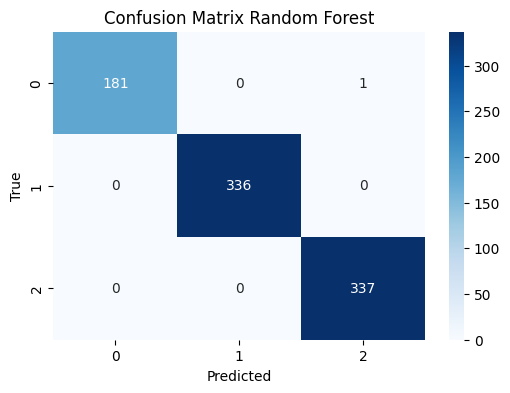

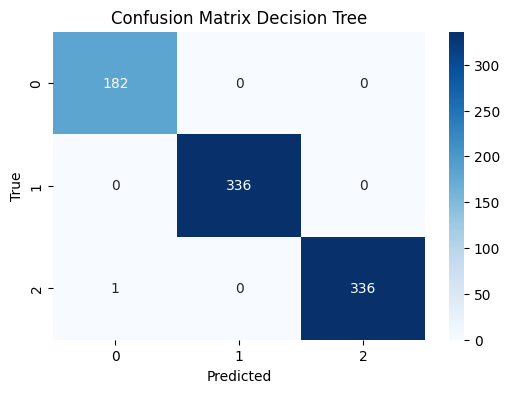

In [ ]:
# Confusion matrix Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Random Forest")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion matrix Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

1. **Perbandingan Hasil Evaluasi Sebelum dan Sesudah**
  - **Random Forest**:
  
    Setelah dilakukan hyperparameter tuning menggunakan GridSearchCV, akurasi Random Forest meningkat dari 93.22% menjadi 99.88%. Selain itu, precision, recall, dan F1-score yang sebelumnya masing-masing 94.12%, 93.22%, dan 92.82%, kini naik menjadi 99.88% di semua metrik, menunjukkan peningkatan signifikan dalam kemampuan model untuk mengklasifikasikan data dengan benar. Hal ini menunjukkan bahwa tuning parameter seperti min_samples_split dan n_estimators membantu meningkatkan generalisasi model tanpa menyebabkan overfitting.

  - **Decision Tree**:
  
    Model Decision Tree yang sebelumnya sudah memiliki performa sangat tinggi dengan akurasi 99.77% kini meningkat menjadi 99.88% setelah hyperparameter tuning. Metrik precision, recall, dan F1-score juga meningkat dari 99.77% menjadi 99.88%. Peningkatan ini menunjukkan bahwa optimalisasi parameter seperti max_depth, min_samples_split, dan min_samples_leaf mampu memberikan model yang lebih optimal, namun dengan peningkatan yang tidak terlalu drastis dibandingkan dengan Random Forest.

2. **Identifikasi Kelemahan Model**
  - **Random Forest**:
  
    Meskipun akurasi meningkat setelah tuning, jumlah estimator yang digunakan setelah tuning relatif kecil (n_estimators = 10), yang dapat menyebabkan model kehilangan salah satu keunggulan utama Random Forest, yaitu kestabilan prediksi. Model dengan lebih sedikit estimator mungkin lebih cepat dalam prediksi tetapi berpotensi kehilangan generalisasi jika diuji pada data yang benar-benar baru.

  - **Decision Tree**:
    
    Meskipun performa Decision Tree sangat tinggi, model ini masih berpotensi mengalami overfitting, terutama karena memiliki kedalaman maksimum (max_depth = 10). Jika model terlalu spesifik terhadap data latih, performanya bisa menurun pada data yang belum pernah dilihat sebelumnya. Selain itu, perbedaannya dengan Random Forest semakin kecil, sehingga pemilihan model bisa lebih bergantung pada kebutuhan interpretasi vs. kestabilan prediksi.

3. **Rekomendasi**
  - Gunakan teknik cross-validation atau dataset tambahan untuk memastikan bahwa model tidak mengalami overfitting dan tetap memiliki performa yang baik di luar data training.
  - Pertimbangkan untuk menggunakan model lain seperti Gradient Boosting atau XGBoost yang mungkin lebih robust dan akurat untuk dataset yang lebih kompleks.
  - Lakukan analisis feature importance untuk memahami kontribusi fitur dalam prediksi dan mengurangi kompleksitas model jika diperlukan.